Strategies for time-series analysis, with bike-sharing-demand regression 

In [1]:
from sklearn.datasets import fetch_openml 

bike_sharing = fetch_openml("Bike_Sharing_Demand", version=2, as_frame=True, parser="pandas")
df = bike_sharing.frame

In [2]:
df.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count
0,spring,0,1,0,False,6,False,clear,9.84,14.395,0.81,0.0,16
1,spring,0,1,1,False,6,False,clear,9.02,13.635,0.80,0.0,40
2,spring,0,1,2,False,6,False,clear,9.02,13.635,0.80,0.0,32
3,spring,0,1,3,False,6,False,clear,9.84,14.395,0.75,0.0,13
4,spring,0,1,4,False,6,False,clear,9.84,14.395,0.75,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   year        17379 non-null  int64   
 2   month       17379 non-null  int64   
 3   hour        17379 non-null  int64   
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  int64   
 6   workingday  17379 non-null  category
 7   weather     17379 non-null  category
 8   temp        17379 non-null  float64 
 9   feel_temp   17379 non-null  float64 
 10  humidity    17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  count       17379 non-null  int64   
dtypes: category(4), float64(4), int64(5)
memory usage: 1.3 MB


In [4]:
df.columns

Index(['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'feel_temp', 'humidity', 'windspeed', 'count'],
      dtype='object')

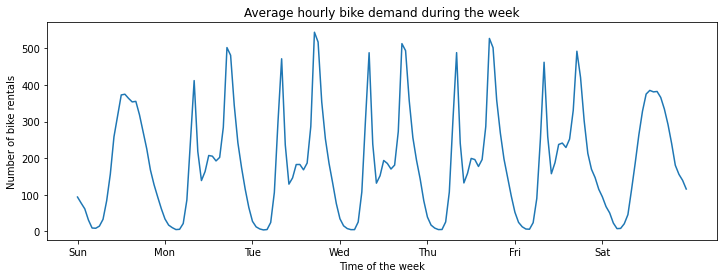

In [5]:
#Looking into the dataset 

import matplotlib.pyplot as plt 
%matplotlib inline 

fig, ax = plt.subplots(figsize=(12, 4))
avg_week_demand = df.groupby(["weekday", "hour"])["count"].mean()
avg_week_demand.plot(ax = ax)

viz = ax.set(title="Average hourly bike demand during the week",
            xticks = [i * 24 for i in range(7)],
            xticklabels = ["Sun","Mon","Tue","Wed","Thu","Fri","Sat"],
            xlabel = "Time of the week", 
            ylabel = "Number of bike rentals")

In [6]:
df["count"].max()

977

In [7]:
#rescaling target variable - count 
y = df["count"] / df["count"].max()

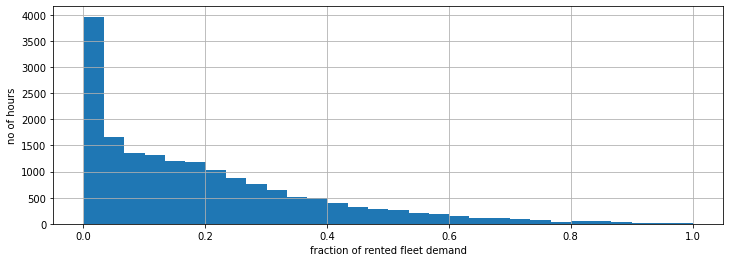

In [8]:
fig, ax = plt.subplots(figsize=(12,4))
y.hist(bins=30, ax=ax)
vi = ax.set(xlabel="fraction of rented fleet demand",ylabel="no of hours")

In [9]:
X = df.drop("count", axis="columns")
X

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed
0,spring,0,1,0,False,6,False,clear,9.84,14.395,0.81,0.0000
1,spring,0,1,1,False,6,False,clear,9.02,13.635,0.80,0.0000
2,spring,0,1,2,False,6,False,clear,9.02,13.635,0.80,0.0000
3,spring,0,1,3,False,6,False,clear,9.84,14.395,0.75,0.0000
4,spring,0,1,4,False,6,False,clear,9.84,14.395,0.75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,spring,1,12,19,False,1,True,misty,10.66,12.880,0.60,11.0014
17375,spring,1,12,20,False,1,True,misty,10.66,12.880,0.60,11.0014
17376,spring,1,12,21,False,1,True,clear,10.66,12.880,0.60,11.0014
17377,spring,1,12,22,False,1,True,clear,10.66,13.635,0.56,8.9981


In [10]:
X["weather"].value_counts()

clear         11413
misty          4544
rain           1419
heavy_rain        3
Name: weather, dtype: int64

In [11]:
X["weather"].replace("heavy_rain", "rain", inplace=True)
X["weather"].value_counts()

clear    11413
misty     4544
rain      1422
Name: weather, dtype: int64

A time-sensitive cross-validation splitter is used to evaluate our demand forecasting model, gap of 2 days or 48 hours, and keeping 1000 datapoints for testing

In [12]:
from sklearn.model_selection import TimeSeriesSplit 

ts_cv =TimeSeriesSplit(n_splits=5, gap=48, max_train_size=10000, test_size=1000)

In [13]:
all_splits = list(ts_cv.split(X,y))
train_0, test_0 = all_splits[0]

In [14]:
X.iloc[test_0]

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed
12379,summer,1,6,0,False,2,True,clear,22.14,25.760,0.68,27.9993
12380,summer,1,6,1,False,2,True,misty,21.32,25.000,0.77,22.0028
12381,summer,1,6,2,False,2,True,rain,21.32,25.000,0.72,19.9995
12382,summer,1,6,3,False,2,True,rain,20.50,24.240,0.82,12.9980
12383,summer,1,6,4,False,2,True,rain,20.50,24.240,0.82,12.9980
...,...,...,...,...,...,...,...,...,...,...,...,...
13374,fall,1,7,11,False,1,True,clear,34.44,40.150,0.53,15.0013
13375,fall,1,7,12,False,1,True,clear,34.44,39.395,0.49,8.9981
13376,fall,1,7,13,False,1,True,clear,34.44,39.395,0.49,19.0012
13377,fall,1,7,14,False,1,True,clear,36.08,40.910,0.42,7.0015


In [15]:
X.iloc[train_0]

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed
2331,summer,0,4,1,False,2,True,misty,25.42,31.060,0.50,6.0032
2332,summer,0,4,2,False,2,True,misty,24.60,31.060,0.53,8.9981
2333,summer,0,4,3,False,2,True,misty,23.78,27.275,0.56,8.9981
2334,summer,0,4,4,False,2,True,misty,22.96,26.515,0.64,8.9981
2335,summer,0,4,5,False,2,True,misty,22.14,25.760,0.68,8.9981
...,...,...,...,...,...,...,...,...,...,...,...,...
12326,summer,1,6,19,False,6,False,clear,26.24,31.060,0.36,11.0014
12327,summer,1,6,20,False,6,False,clear,25.42,31.060,0.35,19.0012
12328,summer,1,6,21,False,6,False,clear,24.60,31.060,0.40,7.0015
12329,summer,1,6,22,False,6,False,clear,23.78,27.275,0.46,8.9981


`Gradient Boosting Regression` with decision trees is often flexible enough to effficiently handle heteorogenous tabular data with a mix of categorical and numerical features as long as the number of samples is large enough

In [16]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.ensemble import HistGradientBoostingRegressor 
from sklearn.model_selection import cross_validate 

In [17]:
categorical_columns = ["weather", "season","holiday","workingday"]
categories = [["clear","misty","rain"],
            ["spring","summer","fall","winter"],
            ["False","True"],
            ["False","True"]]

ordinal_encoder = OrdinalEncoder(categories=categories)

In [18]:
gbrt_pipeline = make_pipeline(ColumnTransformer(transformers=[("categorical", ordinal_encoder, categorical_columns)],remainder="passthrough",verbose_feature_names_out=False), HistGradientBoostingRegressor(categorical_features=categorical_columns)).set_output(transform="pandas")

Evaluating our gradient boosting pipeline model with the mean absolute error 

In [19]:
def evaluate(model, X, y, cv):
    cv_results = cross_validate(model, X, y, cv = cv, 
                                scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"])
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )

In [20]:
evaluate(gbrt_pipeline, X, y, cv = ts_cv)

Mean Absolute Error:     0.044 +/- 0.003
Root Mean Squared Error: 0.068 +/- 0.005


`Naive Linear Regression`

In [21]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import RidgeCV 
import numpy as np 

In [22]:
one_hot_encoder = OneHotEncoder(handle_unknown="ignore",sparse_output=False)
alphas = np.logspace(-6, 6, 25)
naive_linear_pipeline = make_pipeline(ColumnTransformer(transformers=[("categorical", one_hot_encoder, categorical_columns)], remainder=MinMaxScaler()), RidgeCV(alphas=alphas))
evaluate(naive_linear_pipeline, X, y, cv = ts_cv)

Mean Absolute Error:     0.142 +/- 0.014
Root Mean Squared Error: 0.184 +/- 0.020


Time steps as categories 

###### Since, time features are encoded in a discrete manner using 24 unique values in the "hours" feature, we could decide to treat those as categorical variables 

In [23]:
one_hot_linear_pipeline = make_pipeline(
    ColumnTransformer(
    transformers=[("categorical",one_hot_encoder, categorical_columns), ("one_hot_time",one_hot_encoder, ["hour","weekday","month"])], remainder=MinMaxScaler()
    ), RidgeCV(alphas=alphas)
)
evaluate(one_hot_linear_pipeline, X, y, cv=ts_cv)

Mean Absolute Error:     0.099 +/- 0.011
Root Mean Squared Error: 0.131 +/- 0.011


Trigonometric Features

In [24]:
from sklearn.preprocessing import FunctionTransformer 

In [25]:
def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))

def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi)) 

In [26]:
import pandas as pd 
hour_df = pd.DataFrame(np.arange(26).reshape(-1,1), columns=["hour"])

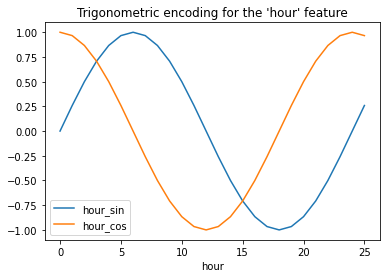

In [27]:
hour_df["hour_sin"] = sin_transformer(24).fit_transform(hour_df)["hour"]
hour_df["hour_cos"] = cos_transformer(24).fit_transform(hour_df)["hour"]
hour_df.plot(x = "hour")
viz = plt.title("Trigonometric encoding for the 'hour' feature")

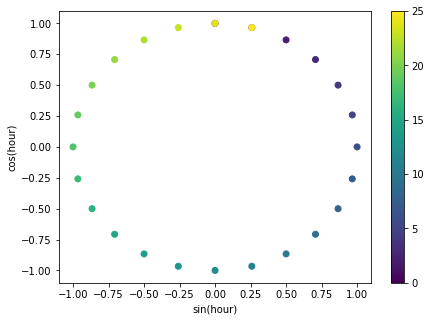

In [28]:
#making it anolog version of clock 

fig, ax = plt.subplots(figsize=(7,5))
sp = ax.scatter(hour_df["hour_sin"], hour_df["hour_cos"], c = hour_df["hour"])
ax.set(xlabel="sin(hour)", ylabel="cos(hour)")
viz = fig.colorbar(sp)

In [29]:
#building feature extraction pipeline using this strategy


cyclic_cossin_transformer = ColumnTransformer(
    transformers=[
    ("categorical", one_hot_encoder, categorical_columns),
    ("month_sin", sin_transformer(12), ["month"]),
    ("month_cos", cos_transformer(12), ["month"]),
    ("weekday_sin", sin_transformer(7), ["weekday"]),
    ("weekdaycos", cos_transformer(7), ["weekday"]),
    ("hour_sin", sin_transformer(24), ["hour"]),
    ("hour_cos", cos_transformer(24), ["hour"])
    ], remainder=MinMaxScaler()
)

cyclic_cossin_linear_pipeline = make_pipeline(cyclic_cossin_transformer, RidgeCV(alphas=alphas))

evaluate(cyclic_cossin_linear_pipeline, X, y, cv = ts_cv)

Mean Absolute Error:     0.125 +/- 0.014
Root Mean Squared Error: 0.166 +/- 0.020


In [30]:
#Periodic Spline Features 

from sklearn.preprocessing import SplineTransformer 

def periodic_spline_transformer(period, n_splines = None, degree = 3):
    if n_splines is None:
        n_splines = period 
    n_knots = n_splines + 1 
    return SplineTransformer(degree=degree, n_knots=n_knots, knots=np.linspace(0, period, n_knots).reshape(n_knots, 1), extrapolation="periodic", include_bias=True)


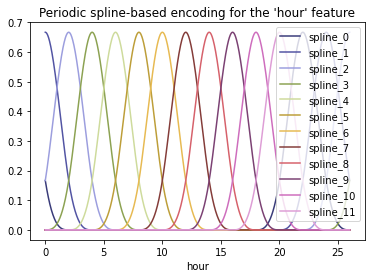

In [31]:
hour_df = pd.DataFrame(np.linspace(0, 26, 1000).reshape(-1, 1), columns=["hour"])
splines = periodic_spline_transformer(24, n_splines=12).fit_transform(hour_df)
splines_df = pd.DataFrame(
    splines,
    columns=[f"spline_{i}" for i in range(splines.shape[1])],
)
pd.concat([hour_df, splines_df], axis="columns").plot(x="hour", cmap=plt.cm.tab20b)
viz = plt.title("Periodic spline-based encoding for the 'hour' feature")

In [32]:
cyclic_spline_transformer = ColumnTransformer(
    transformers=[
        ("categorical", one_hot_encoder, categorical_columns),
        ("cyclic_month", periodic_spline_transformer(12, n_splines=6), ["month"]),
        ("cyclic_weekday", periodic_spline_transformer(7, n_splines=3), ["weekday"]),
        ("cyclic_hour", periodic_spline_transformer(24, n_splines=12), ["hour"]),
    ], remainder=MinMaxScaler())
cyclic_spline_linear_pipeline = make_pipeline(cyclic_spline_transformer, RidgeCV(alphas=alphas))

evaluate(cyclic_spline_linear_pipeline, X, y, cv=ts_cv)

Mean Absolute Error:     0.097 +/- 0.011
Root Mean Squared Error: 0.132 +/- 0.013


Analyzing impact of features on linear model predictions

In [33]:
naive_linear_pipeline.fit(X.iloc[train_0], y.iloc[train_0])
naive_linear_predictions = naive_linear_pipeline.predict(X.iloc[test_0])

one_hot_linear_pipeline.fit(X.iloc[train_0], y.iloc[train_0])
one_hot_linear_predictions = one_hot_linear_pipeline.predict(X.iloc[test_0])

cyclic_cossin_linear_pipeline.fit(X.iloc[train_0], y.iloc[train_0])
cyclic_cossin_linear_predictions = cyclic_cossin_linear_pipeline.predict(X.iloc[test_0])

cyclic_spline_linear_pipeline.fit(X.iloc[train_0], y.iloc[train_0])
cyclic_spline_linear_predictions = cyclic_spline_linear_pipeline.predict(X.iloc[test_0])

Visualize those predictions by zooming on the last 96 hours (4 days) of the test set

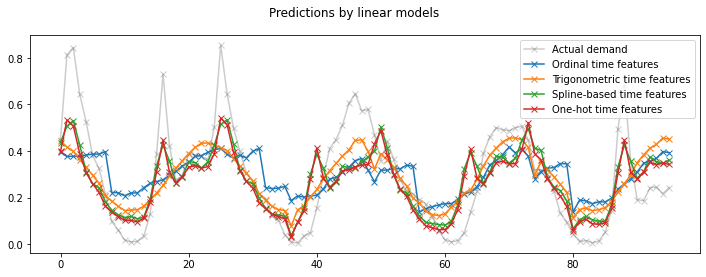

In [34]:
last_hours = slice(-96, None)
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle("Predictions by linear models")
ax.plot(
    y.iloc[test_0].values[last_hours],
    "x-",
    alpha=0.2,
    label="Actual demand",
    color="black",
)
ax.plot(naive_linear_predictions[last_hours], "x-", label="Ordinal time features")
ax.plot(
    cyclic_cossin_linear_predictions[last_hours],
    "x-",
    label="Trigonometric time features",
)
ax.plot(
    cyclic_spline_linear_predictions[last_hours],
    "x-",
    label="Spline-based time features",
)
ax.plot(
    one_hot_linear_predictions[last_hours],
    "x-",
    label="One-hot time features",
)
_ = ax.legend()